# DX 601 Week 3 Homework

## Introduction

In this homework, you will practice plotting data and calculating model predictions and losses.

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for sample code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Instructions

You should replace every instance of "..." below.
These are where you are expected to write code to answer each problem.

After some of the problems, there are extra code cells that will test functions that you wrote so you can quickly see how they run on an example.
If your code works on these examples, it is more likely to be correct.
However, the autograder will test different examples, so working correctly on these examples does not guarantee full credit for the problem.
You may change the example inputs to further test your functions on your own.
You may also add your own example inputs for problems where we did not provide any.

Be sure to run each code block after you edit it to make sure it runs as expected.
When you are done, we strongly recommend you run all the code from scratch (Runtime menu -> Restart and Run all) to make sure your current code works for all problems.

If your code raises an exception when run from scratch, it will  interfere with the auto-grader process causing you to lose some or all points for this homework.
Please ask for help in YellowDig or schedule an appointment with a learning facilitator if you get stuck.


## Shared Imports

Do not install or use any additional modules.
Installing additional modules may result in an autograder failure resulting in zero points for some or all problems.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

### Problem 1 (3 points)

The code below loads a small mango data set into the variable `mango_data`.
The variable `mango_data` is a pandas dataframe which lets you easily access data one row at a time or one column at a time.


In [3]:
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

In [4]:
mango_data

,green_rating,yellow_rating,softness,wrinkles,estimated_flavor,estimated_sweetness,rated_flavor
0,1,5,4,0,4,4,5
1,1,5,5,1,5,5,1
2,2,4,3,1,3,3,3
3,3,3,2,0,2,1,2
4,5,1,1,1,1,1,1
5,4,2,1,1,1,1,1
6,5,1,1,1,2,1,1
7,3,3,2,1,2,2,2


Given a dataframe, you can select a column by indexing it with the name of the column.
The indexing operation uses square brackets and the name of the column goes between them.
Here is an example selecting the "softness" column of the mango data.

In [5]:
mango_data["softness"]

0    4
1    5
2    3
3    2
4    1
5    1
6    1
7    2
Name: softness, dtype: int64

Most Python operations and functions that work with sequences such as lists also work with Pandas dataframe columns.
For example, you can compute the sum of a dataframe column using the `sum` function.

In [6]:
sum(mango_data["softness"])

19

Set `p1` to the average of the estimated sweetness column in the small mango data set.

In [7]:
# YOUR CHANGES HERE
import pandas as pd
# Read the data
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")
# Find mean of estimated_sweetness
p1 = mango_data['estimated_sweetness'].mean()

Check the value of `p1`.

In [8]:
p1

2.25

### Problem 2 (3 points)

Plot the small mango data set using the estimated sweetness as the x axis and the rated flavor as the y axis.

To do this, edit the line below that says
```
#p2 = plt.scatter(..., ...)
```
The first ellipsis should be replaced with the x data, and the second ellipsis should be replaced with the y data.
After you do this, uncomment the line by removing the `#` character at the beginning.
Make sure not to leave any extra spaces there.

Index(['green_rating', 'yellow_rating', 'softness', 'wrinkles',
       'estimated_flavor', 'estimated_sweetness', 'rated_flavor'],
      dtype='object')


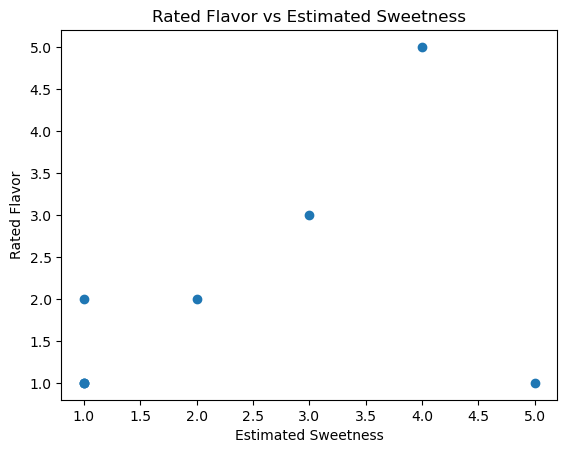

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
# Reading the file
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# assigning x-axis and y-axis 
x_data = mango_data["estimated_sweetness"]  # X-axis data
y_data = mango_data["rated_flavor"]   

# creating a scatter plot
p2 = plt.scatter(x_data, y_data)
print(mango_data.columns)


plt.xlabel("Estimated Sweetness")
plt.ylabel("Rated Flavor")
plt.title("Rated Flavor vs Estimated Sweetness")
plt.show()

### Problem 3 (3 points)

The function `f3` implements a very simple linear function.
`f3` takes in a dataframe and returns the "estimated_sweetness" column as its output.
So $f_3(x) = 1.0 (\mathrm{estimated~sweetness})$.

In [10]:
def f3(df):
    return df["estimated_sweetness"].rename("prediction")

In [11]:
f3(mango_data)

0    4
1    5
2    3
3    1
4    1
5    1
6    1
7    2
Name: prediction, dtype: int64

Set `p3` to be the residuals from using `f3` as a model predicting the rated flavor column.
The result should be a sequence of residuals, not a single number.

A Python list, NumPy array, or pandas are all acceptable output types.
Whatever output type you use, the order of outputs should match the order of rows in the mango data set.

In [12]:
# YOUR CHANGES HERE

p3 = mango_data["rated_flavor"] - f3(mango_data)
print(p3)

p3_list = p3.tolist()  # Convert to list
p3_array = p3.to_numpy()  # Convert to NumPy array

0    1
1   -4
2    0
3    1
4    0
5    0
6    0
7    0
dtype: int64


Check the value of `p3`.

In [13]:
p3

0    1
1   -4
2    0
3    1
4    0
5    0
6    0
7    0
dtype: int64

### Problem 4 (3 points)

The function `f4` is another linear function computing $f_4(x) = 0.8 (\mathrm{yellow~rating}) + 0.2 (\mathrm{softness})$.


In [14]:
def f4(df):
    return 0.8 * df["yellow_rating"] + 0.2 * df["softness"]

In [15]:
f4(mango_data)

0    4.8
1    5.0
2    3.8
3    2.8
4    1.0
5    1.8
6    1.0
7    2.8
dtype: float64

Set `p4` to be the $L_1$ loss of each row of data after using `f4` to predict the rated flavor column.
The result should be a sequence of losses, not a single number.

A Python list, NumPy array, or pandas are all acceptable output types.
Whatever output type you use, the order of outputs should match the order of rows in the mango data set.

In [16]:
# YOUR CHANGES HERE
# we extract rated_flavor values
p4 = abs(mango_data["rated_flavor"] - f4(mango_data)) 
print(p4)

0    0.2
1    4.0
2    0.8
3    0.8
4    0.0
5    0.8
6    0.0
7    0.8
dtype: float64


Check the value of `p4`.

In [17]:
p4

0    0.2
1    4.0
2    0.8
3    0.8
4    0.0
5    0.8
6    0.0
7    0.8
dtype: float64

### Problem 5 (3 points)

The function `f5` is another linear function computing $f_5(x) = 1.1 (\mathrm{yellow~rating}) - 0.1 (\mathrm{green~rating})$.

In [18]:
def f5(df):
    return 1.1 * df["yellow_rating"] - 0.1 * df["green_rating"]

In [19]:
f5(mango_data)

0    5.4
1    5.4
2    4.2
3    3.0
4    0.6
5    1.8
6    0.6
7    3.0
dtype: float64

Set `p5` to be the $L_2$ loss of each row of data after using `f5` to predict the rated flavor column.
The result should be a sequence of losses, not a single number.

A Python list, NumPy array, or pandas are all acceptable output types.
Whatever output type you use, the order of outputs should match the order of rows in the mango data set.

In [20]:
# YOUR CHANGES HERE
import pandas as pd
def f5(df):
    return 1.1 * df["yellow_rating"] - 0.1 * df["green_rating"]
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

p5 = (mango_data["rated_flavor"] - f5(mango_data)) ** 2
print(p5)

0     0.16
1    19.36
2     1.44
3     1.00
4     0.16
5     0.64
6     0.16
7     1.00
dtype: float64


Check the value of `p5`.

In [21]:
p5

0     0.16
1    19.36
2     1.44
3     1.00
4     0.16
5     0.64
6     0.16
7     1.00
dtype: float64

### Problem 6 (4 points)

The function `f6` is a linear function computing $f_6(x) = 1.2 (\mathrm{yellow~rating}) - 0.1 (\mathrm{green~rating}) - 0.1 (\mathrm{wrinkles})$.

Note that the average $L_2$ loss was requested.
Some of the videos this week calculated the sum of $L_2$ losses instead.

In [22]:
def f6(df):
    return 1.2 * df["yellow_rating"] - 0.1 * df["green_rating"] - 0.1 * df["wrinkles"]

In [23]:
f6(mango_data)

0    5.9
1    5.8
2    4.5
3    3.3
4    0.6
5    1.9
6    0.6
7    3.2
dtype: float64

Set `p6` to be the average $L_2$ loss using `f6` to predict the rated flavor column.

Note that the average $L_2$ loss was requested.
Some of the videos this week calculated the sum of $L_2$ losses instead.

In [24]:
import pandas as pd

# Load the dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Define f6 function
def f6(df):
    result = 1.2 * df["yellow_rating"] - 0.1 * df["green_rating"] - 0.1 * df["wrinkles"]
    
    # Only round if input is a Pandas DataFrame
    if isinstance(df, pd.DataFrame):
        return result.round(2)
    else:
        return result  # Return raw float value for scalar inputs

# Compute predictions
predictions_f6 = f6(mango_data)

# Compute residuals
residuals = mango_data["rated_flavor"] - predictions_f6

# Compute squared residuals (L2 Loss)
l2_losses = residuals ** 2

# Compute average L2 loss (Mean Squared Error)
p6 = round(l2_losses.mean(), 2)  # Ensure correct rounding

# Print values to debug
print("Corrected Average L2 Loss (MSE):", p6)

Corrected Average L2 Loss (MSE): 3.8


Check the value of `p6`.

In [25]:
p6

3.8

### Problem 7 (4 points)

Write a function `p7` taking in a dataframe like the mangos data, and returning the "estimated_flavor" column as its predictions.
(This should be similar to the predictions in Problem 3.)

In [26]:
# YOUR CHANGES HERE

def p7(df):
    return df["estimated_flavor"].rename("prediction")
predictions = p7(mango_data)
print(predictions) 

0    4
1    5
2    3
3    2
4    1
5    1
6    2
7    2
Name: prediction, dtype: int64


Check the output of p7 on the mango data set.

In [27]:
p7(mango_data)

0    4
1    5
2    3
3    2
4    1
5    1
6    2
7    2
Name: prediction, dtype: int64

### Problem 8 (4 points)

Set `p8` to be the average $L_2$ loss using the "yellow_rating" column to predict the "rated_flavor" column as in Problem 3.

In [28]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Compute L2 loss (Squared Error)
l2_losses = (mango_data["rated_flavor"] - mango_data["yellow_rating"]) ** 2

# Compute Average L2 loss (Mean Squared Error)
p8 = l2_losses.mean()

# Print p8 
print("Average L2 Loss (MSE):", p8)

Average L2 Loss (MSE): 2.5


Check the value of `p8`.

In [29]:
p8

2.5

### Problem 9 (4 points)

Write a function `p9` taking in a dataframe returning the results of $0.5 (\mathrm{yellow~rating}) + 0.4 (\mathrm{estimated~flavor})$.

In [30]:
def p9(df):
    return (0.5 * df["yellow_rating"] + 0.4 * df["estimated_flavor"]).rename("prediction")

predictions = p9(mango_data)
print(predictions) 

0    4.1
1    4.5
2    3.2
3    2.3
4    0.9
5    1.4
6    1.3
7    2.3
Name: prediction, dtype: float64


Check the output of `p9` with the mango data set.

In [31]:
p9(mango_data)

0    4.1
1    4.5
2    3.2
3    2.3
4    0.9
5    1.4
6    1.3
7    2.3
Name: prediction, dtype: float64

### Problem 10 (4 points)

Set `p10` to be the average $L_1$ loss using the prediction $0.3 (\mathrm{yellow~rating}) + 0.1(\mathrm{softness}) + 0.4(\mathrm{estimated~sweetness})$ for the mango data set's rated flavor column.

In [32]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Compute predictions
predicted_values = (0.3 * mango_data["yellow_rating"] +
                    0.1 * mango_data["softness"] +
                    0.4 * mango_data["estimated_sweetness"])

# Compute L1 loss (Absolute Error)
l1_losses = abs(mango_data["rated_flavor"] - predicted_values)

# Compute Average L1 loss (Mean Absolute Error)
p10 = l1_losses.mean()

# Print p10 (Optional: For verification)
print("Average L1 Loss (MAE):", p10)

Average L1 Loss (MAE): 0.7375


Check the value of `p10`.

In [33]:
p10

0.7375

### Problem 11 (4 points)

Problems 6 and 8 asked you to calculate the average $L_2$ loss for different ways of predicting the rated flavor.
Set `p11` to be the problem number with the best $L_2$ loss (i.e. 6 or 8).

In [34]:
# Compare L2 losses from Problem 6 and Problem 8
p6 = l2_losses.mean()
p11 = 6 if p6 < p8 else 8

# Print p11 
print("Best L2 loss comes from Problem:", p11)

Best L2 loss comes from Problem: 8


### Problem 12 (4 points)

Which of the following functions is not linear?

a. $f(x) = x + 3$

b. $f(x) = 0.999 x + 0.001$

c. $f(x) = 0.3 x^2 + 0.6 x + 0.1$

Set `p12` to be `"a"`, `"b"`, or `"c"` to indicate your answer.

In [35]:
p12 = "c"

# Print p12 
print("The non-linear function is:", p12)

The non-linear function is: c


### Problem 13 (4 points)

Set `p13` to be the sample variance of the rated flavors in the mango data set.

In [36]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Compute sample variance of "rated_flavor"
p13 = mango_data["rated_flavor"].var()

# Print p13 
print("Sample Variance of Rated Flavor:", p13)

Sample Variance of Rated Flavor: 2.0


### Problem 14 (4 points)

Set `p14` to be the means of each column of the mango data set.
Your output should be a sequence of the means in the same order as the columns of the mango data set.

You can calculate this however you like with just Python, NumPy's [numpy.mean](), or pandas' [pandas.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) method.
We suggest trying the pandas method for your own convenience.


In [37]:


import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Compute means of all columns
p14 = mango_data.mean().tolist()  # Convert to a list

# Print p14 
print("Means of each column:", p14)

Means of each column: [3.0, 3.0, 2.375, 0.75, 2.5, 2.25, 2.0]


### Problem 15 (4 points)

Set `p15` to be the median of the estimated flavor column in the mango data set.

You may find NumPy's [numpy.median](https://numpy.org/doc/stable/reference/generated/numpy.median.html) function or pandas' [pandas.DataFrame.median](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html) method helpful.

In [38]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Compute the median of the "estimated_flavor" column
p15 = mango_data["estimated_flavor"].median()

# Print p15 
print("Median of Estimated Flavor:", p15)

Median of Estimated Flavor: 2.0


### Problem 16 (4 points)

Given the following three functions,

* $f_a(x) = 1.0 (\mathrm{yellow~rating})$
* $f_b(x) = 0.4 (\mathrm{yellow~rating}) + 0.6 (\mathrm{estimated~sweetness})$
* $f_c(x) = 0.4 (\mathrm{yellow~rating}) + 0.2 (\mathrm{softness}) + 0.3 (\mathrm{estimated~sweetness})$

set `p16` to `"a"`, `"b"`, or `"c"` to indicate which one has the lowest $L_1$ loss predicting the rated flavor column.


In [39]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Define prediction functions
f_a = mango_data["yellow_rating"]
f_b = 0.4 * mango_data["yellow_rating"] + 0.6 * mango_data["estimated_sweetness"]
f_c = 0.4 * mango_data["yellow_rating"] + 0.2 * mango_data["softness"] + 0.3 * mango_data["estimated_sweetness"]

# Compute L1 loss (absolute errors)
l1_loss_a = abs(mango_data["rated_flavor"] - f_a).mean()
l1_loss_b = abs(mango_data["rated_flavor"] - f_b).mean()
l1_loss_c = abs(mango_data["rated_flavor"] - f_c).mean()

# Determine which function has the lowest L1 loss
p16 = min([("a", l1_loss_a), ("b", l1_loss_b), ("c", l1_loss_c)], key=lambda x: x[1])[0]

# Print results
print("L1 Loss for f_a:", l1_loss_a)
print("L1 Loss for f_b:", l1_loss_b)
print("L1 Loss for f_c:", l1_loss_c)
print("Function with lowest L1 loss:", p16)

L1 Loss for f_a: 1.0
L1 Loss for f_b: 0.75
L1 Loss for f_c: 0.675
Function with lowest L1 loss: c


### Problem 17 (4 points)

Load the data file "f17.tsv" and set `p17` to be a sequence of the means of each column.

In [40]:
import pandas as pd

# Load the dataset "f17.tsv"
f17_data = pd.read_csv("f17.tsv", sep="\t")

# Compute the mean of each column and store as a list
p17 = f17_data.mean().tolist()

# Print p17 
print("Means of each column:", p17)

FileNotFoundError: [Errno 2] No such file or directory: 'f17.tsv'

### Problem 18 (4 points)

Set `p18` to be the $R^2$ value of the function `f18` predicting the rated flavor for the mango data set.

In [236]:
def f18(df):
    return 0.7 * df["estimated_flavor"]

In [237]:
import pandas as pd
from sklearn.metrics import r2_score

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Define f18 function
def f18(df):
    return 0.7 * df["estimated_flavor"]

# Compute actual and predicted values
y_actual = mango_data["rated_flavor"]
y_predicted = f18(mango_data)

# Compute R^2 score
p18 = r2_score(y_actual, y_predicted)

# Print p18 
print("R^2 Value:", p18)

R^2 Value: 0.07428571428571418


### Problem 19 (4 points)

Write a function `p19` that takes in an input number `x` and returns $3 x + 1$.

In [238]:
def p19(x):
    return 3 * x + 1

print(p19(2)) 
print(p19(5))

7
16


### Problem 20 (4 points)

Set `p20` to be the average $L_2$ loss of using `f20` to predict the rated flavor of the mango data set.

`f20` is not linear, but this should not affect your loss calculation.

In [239]:
def f20(df):
    return (df["yellow_rating"] ** 2) / 10 + df["estimated_sweetness"] * 0.5

In [240]:
import pandas as pd

# Load mango dataset
mango_data = pd.read_csv("mango-tiny.tsv", sep="\t")

# Define f20 function
def f20(df):
    return (df["yellow_rating"] ** 2) / 10 + df["estimated_sweetness"] * 0.5

# Compute L2 loss (Squared Error)
l2_losses = (mango_data["rated_flavor"] - f20(mango_data)) ** 2

# Compute Average L2 loss (Mean Squared Error)
p20 = l2_losses.mean()

# Print p20 
print("Average L2 Loss (MSE):", p20)

Average L2 Loss (MSE): 2.12
